In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [49]:
df_russia = pd.read_csv('russia_eco_indicators.csv', skiprows=4)
df_ukraine = pd.read_csv('ukr_eco_indicators.csv', skiprows=4)
df_ukraine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1509 entries, 0 to 1508
Data columns (total 70 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    1509 non-null   object 
 1   Country Code    1509 non-null   object 
 2   Indicator Name  1509 non-null   object 
 3   Indicator Code  1509 non-null   object 
 4   1960            88 non-null     float64
 5   1961            91 non-null     float64
 6   1962            91 non-null     float64
 7   1963            91 non-null     float64
 8   1964            91 non-null     float64
 9   1965            97 non-null     float64
 10  1966            93 non-null     float64
 11  1967            93 non-null     float64
 12  1968            93 non-null     float64
 13  1969            93 non-null     float64
 14  1970            147 non-null    float64
 15  1971            149 non-null    float64
 16  1972            148 non-null    float64
 17  1973            148 non-null    f

In [15]:
df_russia.isnull().head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2016,2017,2018,2019,2020,2021,2022,2023,2024,Unnamed: 69
0,False,False,False,False,True,True,True,True,True,True,...,False,False,False,False,False,False,True,True,True,True
1,False,False,False,False,True,True,True,True,True,True,...,True,True,True,True,True,True,False,False,True,True
2,False,False,False,False,True,True,True,True,True,True,...,False,False,False,False,False,False,False,False,True,True
3,False,False,False,False,True,True,True,True,True,True,...,False,False,False,False,False,False,False,False,True,True
4,False,False,False,False,True,True,True,True,True,True,...,False,False,False,False,False,False,False,False,True,True


In [51]:
# Read and filter relevant indicators for Russia and Ukraine
df_russia = pd.read_csv('russia_eco_indicators.csv', skiprows=4)
df_ukraine = pd.read_csv('ukr_eco_indicators.csv', skiprows=4)

# Keep only selected indicators
indicators_to_keep = [
    'GDP (current US$)',
    'GDP growth (annual %)',
    'GDP per capita (current US$)',
    'Unemployment, total (% of total labor force) (national estimate)',
    'Inflation, consumer prices (annual %)',
    'Exports of goods and services (% of GDP)',
    'Imports of goods and services (% of GDP)',
    'External balance on goods and services (current US$)'
]

df_russia = df_russia[df_russia['Indicator Name'].isin(indicators_to_keep)]
df_ukraine = df_ukraine[df_ukraine['Indicator Name'].isin(indicators_to_keep)]

# Keep only year columns (plus 'Indicator Name')
year_cols = [str(year) for year in range(2014, 2024)]  # Adjust max year as needed
columns_to_keep = ['Indicator Name'] + year_cols
df_russia = df_russia[columns_to_keep]
df_ukraine = df_ukraine[columns_to_keep]

# Pivot to wide format with Indicator as column, Year as index
df_russia = df_russia.set_index('Indicator Name').T.reset_index().rename(columns={'index': 'Year'})
df_ukraine = df_ukraine.set_index('Indicator Name').T.reset_index().rename(columns={'index': 'Year'})

# Convert Year to int and values to float
df_russia['Year'] = df_russia['Year'].astype(int)
df_ukraine['Year'] = df_ukraine['Year'].astype(int)

# Convert all indicator columns to float
for col in indicators_to_keep:
    df_russia[col] = pd.to_numeric(df_russia[col], errors='coerce')
    df_ukraine[col] = pd.to_numeric(df_ukraine[col], errors='coerce')


In [59]:
df_russia

Indicator Name,Year,External balance on goods and services (current US$),Exports of goods and services (% of GDP),GDP growth (annual %),GDP (current US$),GDP per capita (current US$),"Unemployment, total (% of total labor force) (national estimate)",Imports of goods and services (% of GDP),"Inflation, consumer prices (annual %)"
0,2014,1.322209e+11,27.111097,0.736267,2.059242e+12,14055.472656,5.212,20.690244,7.823412
1,2015,1.097253e+11,28.703389,-1.972719,1.363482e+12,9277.713867,5.615,20.655960,15.534405
2,2016,6.627601e+10,25.854483,0.193690,1.276786e+12,8663.158203,5.591,20.663637,7.042448
3,2017,8.351502e+10,26.090881,1.825790,1.574199e+12,10658.913086,5.238,20.785643,3.683329
4,2018,1.658259e+11,30.793257,2.807245,1.657329e+12,11211.887695,4.871,20.787644,2.878297
5,2019,1.293219e+11,28.433431,2.198076,1.693115e+12,11447.701172,4.513,20.795323,4.470367
6,2020,7.581037e+10,25.522186,-2.653655,1.493076e+12,10108.327148,5.620,20.444723,3.381659
7,2021,1.722832e+11,29.771214,5.614290,1.843392e+12,12521.522461,4.749,20.425227,6.694459
8,2022,2.898871e+11,28.025719,-2.069712,2.266029e+12,15445.242188,3.867,15.232986,14.300000
9,2023,8.767877e+10,23.083003,3.600000,2.021421e+12,13817.045898,3.076,18.745522,5.200000


In [57]:
df_russia.loc[df_russia['Year'] == 2022, 'Inflation, consumer prices (annual %)'] = 14.3
df_russia.loc[df_russia['Year'] == 2023, 'Inflation, consumer prices (annual %)'] = 5.2

In [29]:
df_ukraine

Indicator Name,Year,GDP per capita (current US$),"Inflation, consumer prices (annual %)","Unemployment, total (% of total labor force) (national estimate)",Imports of goods and services (% of GDP),GDP growth (annual %),GDP (current US$),External balance on goods and services (current US$),Exports of goods and services (% of GDP)
0,2014,3054.908203,12.071856,9.270,52.098821,-10.078895,1.335039e+11,-4.680457e+09,48.592962
1,2015,2094.473877,48.699865,9.140,55.208937,-9.772987,9.103097e+10,-2.377053e+09,52.597680
2,2016,2158.461182,13.912710,9.350,56.222585,2.440982,9.335587e+10,-6.463929e+09,49.298619
3,2017,2604.287598,14.438323,9.500,55.910067,2.359972,1.120905e+11,-8.726414e+09,48.124916
4,2018,3059.051758,10.951856,8.799,53.964579,3.488362,1.308911e+11,-1.142593e+10,45.235236
5,2019,3619.861572,7.886717,8.194,49.279543,3.199504,1.538830e+11,-1.238428e+10,41.231691
6,2020,3709.769287,2.732492,9.475,40.334806,-3.752818,1.566177e+11,-2.369876e+09,38.821646
7,2021,4775.945801,9.363139,9.834,42.009621,3.445621,1.997659e+11,-2.639467e+09,40.688340
8,2022,4199.670898,20.183637,NaN,51.951399,-28.758584,1.619895e+11,-2.673845e+10,35.445115
9,2023,5069.703125,12.849022,NaN,49.512093,5.324335,1.787570e+11,-3.740682e+10,28.586021


In [5]:
df_ukraine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 9 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   Year                                                              10 non-null     int64  
 1   GDP per capita (current US$)                                      10 non-null     float64
 2   Inflation, consumer prices (annual %)                             10 non-null     float64
 3   Unemployment, total (% of total labor force) (national estimate)  8 non-null      float64
 4   Imports of goods and services (% of GDP)                          10 non-null     float64
 5   GDP growth (annual %)                                             10 non-null     float64
 6   GDP (current US$)                                                 10 non-null     float64
 7   External balance on goods and services 

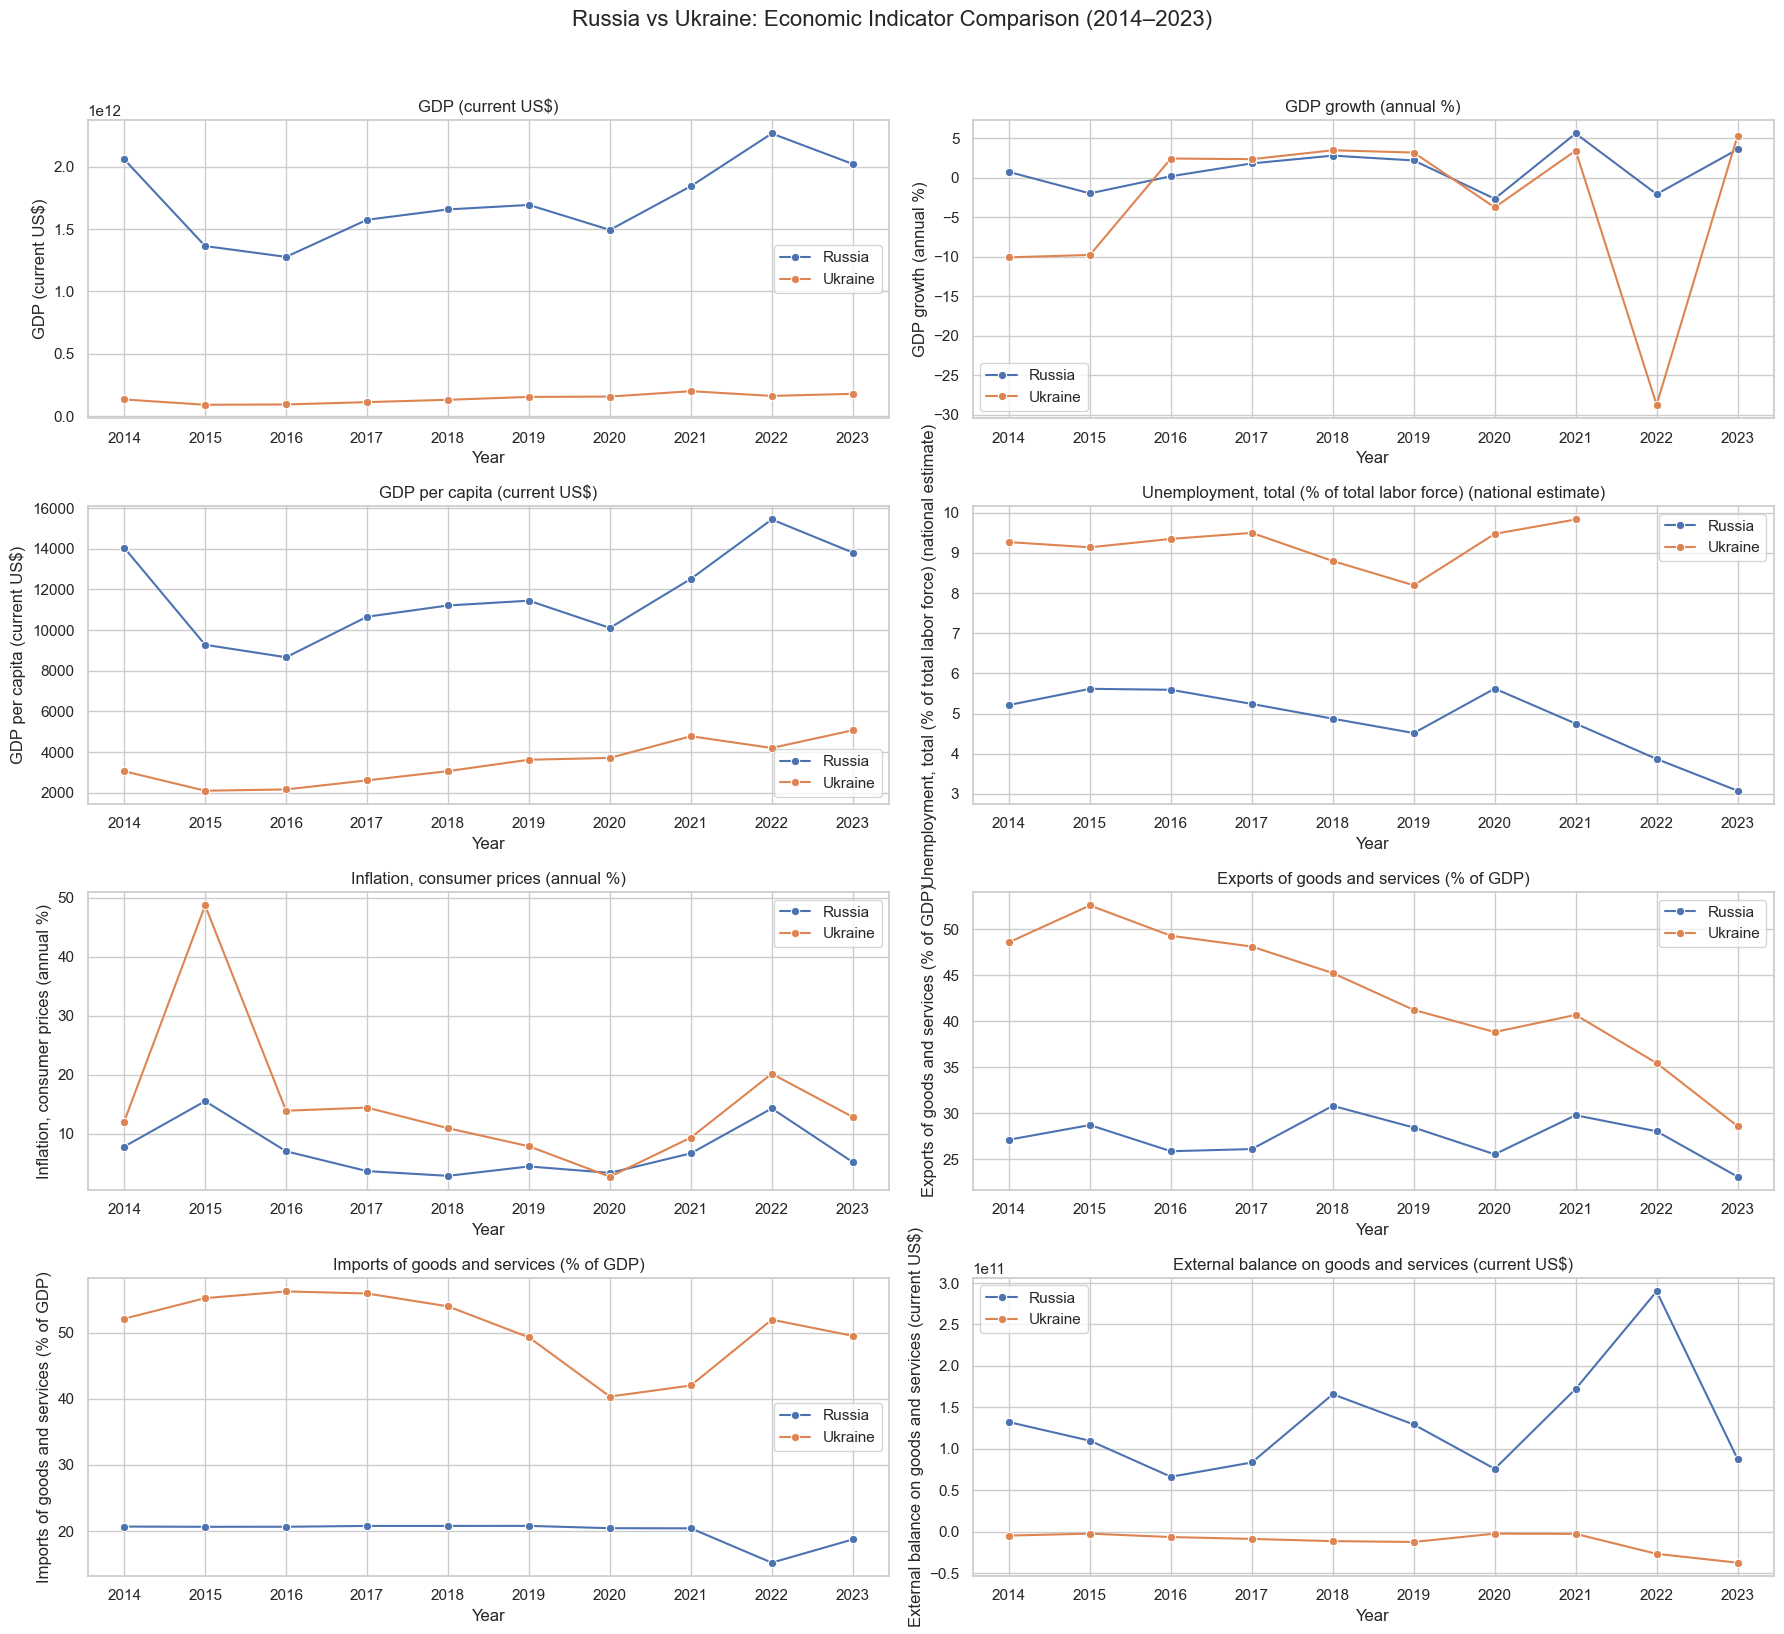

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")
plt.rcParams['axes.titlesize'] = 12

# List of indicators
indicators_to_keep = [
    'GDP (current US$)',
    'GDP growth (annual %)',
    'GDP per capita (current US$)',
    'Unemployment, total (% of total labor force) (national estimate)',
    'Inflation, consumer prices (annual %)',
    'Exports of goods and services (% of GDP)',
    'Imports of goods and services (% of GDP)',
    'External balance on goods and services (current US$)'
]

# Plot comparisons
plt.figure(figsize=(18, 16))
for i, indicator in enumerate(indicators_to_keep, 1):
    plt.subplot(4, 2, i)
    sns.lineplot(data=df_russia, x='Year', y=indicator, label='Russia', marker='o')
    sns.lineplot(data=df_ukraine, x='Year', y=indicator, label='Ukraine', marker='o')
    plt.title(indicator)
    plt.xlabel('Year')
    plt.ylabel(indicator)
    plt.xticks(ticks=[year for year in range(2014, 2024)])
    plt.legend()
    plt.tight_layout()

plt.suptitle("Russia vs Ukraine: Economic Indicator Comparison (2014–2023)", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()


In [4]:
# Extract values for 2021 and 2022
russia_2021 = df_russia.loc[df_russia['Year'] == 2021, 'GDP growth (annual %)'].values[0]
russia_2022 = df_russia.loc[df_russia['Year'] == 2022, 'GDP growth (annual %)'].values[0]

ukraine_2021 = df_ukraine.loc[df_ukraine['Year'] == 2021, 'GDP growth (annual %)'].values[0]
ukraine_2022 = df_ukraine.loc[df_ukraine['Year'] == 2022, 'GDP growth (annual %)'].values[0]

# Calculate percentage decrease
russia_pct_decrease = ((russia_2021 - russia_2022) / abs(russia_2021)) * 100
ukraine_pct_decrease = ((ukraine_2021 - ukraine_2022) / abs(ukraine_2021)) * 100

print(f"Russia GDP growth percentage decrease in 2022: {russia_pct_decrease:.2f}%")
print(f"Ukraine GDP growth percentage decrease in 2022: {ukraine_pct_decrease:.2f}%")


Russia GDP growth percentage decrease in 2022: 136.87%
Ukraine GDP growth percentage decrease in 2022: 934.64%


In [65]:
df_ukraine.to_csv('ukr_cleaned_eco_indicators.csv',index = False)